**Assignment-II: Image Compression Using Principal Component
Analysis..**
* Name: Sakar Gautam
* Student Id: 2065882
* Author: Siman Giri
* Co-Author: Anmol Adhikari



# **Necessary imports**

In [95]:
#importing drive and connecting/mounting to google drive
from google.colab import drive
drive.mount('/content/drive') #path of drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#importing PIL library and importing image
from PIL import Image, ImageOps #here 'ImageOps' is a function
import numpy as np #used for data analysis tasks(for arrays and matrices)
import matplotlib.pyplot as plt # used for data plotting and visualization
import seaborn as sns # used for making attractive and informative statistical graphics(based on matplotlib)

## **Load and Prepare the data:**

Pick an color image of your choice and do the following.
1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.


Pixel type: uint8
Number of dimensions: 3
Image size: (256, 256, 3)


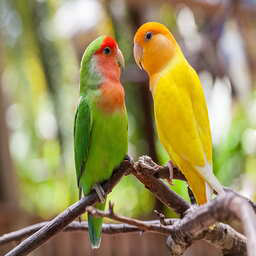

In [97]:
#here img is a variable which holds image
#.open function opens the image from the given path
img = Image.open("/content/drive/MyDrive/AI coursework2/bird.png") #here path of image is given in quotation mark.
img_arry = np.array(img) # stores the image in Numpy array.
print('Pixel type:', img_arry.dtype) #type of pixel is printed in array with datatypes
print('Number of dimensions:', img_arry.ndim) #Dimension for RGB image is printed
print('Image size:', img_arry.shape) #size of image is printed in array with shape
img #displaying image


The above code is used to open an image file and convert it to a numpy array and then print some information about the array.'np.array' converts to a numpy array which is a multidimensional array used for storing and manipulating large arrays of numeric data. 'Shape' gives the size of the array along with the dimension. 'd-type' gives the data type of array element. 'ndim' gives the number of dimension of array. Finally 'img' is used to display the image.

2. For the simplicity, convert the image into gray scale i.e. black and white.

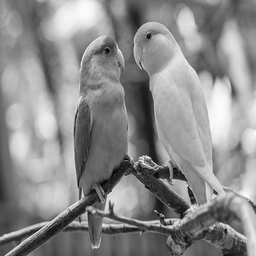

In [98]:
#here 'imgGray' is a new variable
#image is converted into gray scale
imgGray=ImageOps.grayscale(img)#ImageOps is a ready-made image processing operation
im_arry=np.array(imgGray) #new variable 'im_arry' is initialized as array of gray image using numpy
imgGray #displaying gray-scale image



'imgGray' is defined to hold gray scale image and Imageops is a readymade image processing operation which is used to convert image into gray scale. If we want to convert an image to gray scale , we need to store in array. The converted gray scale image is store into array with 'np.array' function. Finally, gray scale image is displayed.

## **Standardize/Scale the data:**

To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before
any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following
expression:
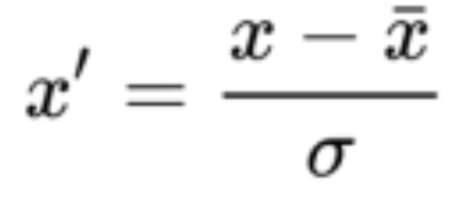

In [99]:
#uInput is defined to store numbers
uInput =im_arry #taking values of image which we have opened in question number one and stored in array
 # find mean and standard deviation
 # values of image is stored in 'uInput'
mean = uInput.mean(axis=0) #finding out the mean of image which is stored in array
std = uInput.std(axis=0) #finding out the standard deviation of image which is stored in array
# print(std)
sValue = np.array([(x - mean) / std
          for x in uInput])
# normalizing an input array 'uInput' by subtracting the mean and dividing by the standard deviation
sValue #displaying 'sValue'

array([[ 1.04996484,  1.02071757,  0.90499694, ..., -0.90666768,
        -0.81170062, -0.73901114],
       [ 1.07999065,  1.02071757,  0.93329882, ..., -0.95178956,
        -0.8571452 , -0.78369919],
       [ 1.11001645,  1.05012049,  0.9616007 , ..., -0.99691143,
        -0.92531208, -0.85073126],
       ...,
       [-0.78160922, -0.94927768, -0.90632359, ...,  0.53723233,
         0.73341522,  0.93679067],
       [-1.26202208, -0.74345728, -0.7082104 , ...,  0.46954951,
         0.66524835,  0.91444665],
       [-0.75158341, -0.68465145, -1.18934242, ...,  0.42442764,
         0.64252606,  0.8697586 ]])

The above code is used to normalize an image by subtracting the mean and dividing by the standard deviation of each channel(red,green,blue). The mean of each channel is calculated separately along 0 axis. Also, standard deviation is calculated along 0 axis. 'Svalue' as a new array is defined by applying normalizing formula. The normalized array sValue is then shown. A frequent preprocessing step in machine learning is normalization, which can assist scale the data to make it simpler for a model to learn from.

## **Calculate Covariance Matrix:**

Each element of the covariance matrix represents covariance between each ijth element. The covariance between two elements is calculated and stored in the matrix as shown in picture below: 

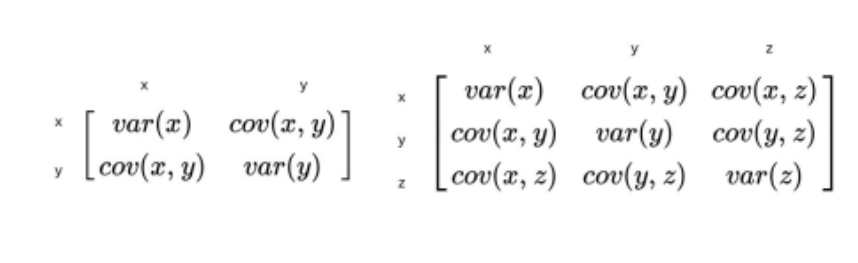

In [100]:
# uInput is defined to store numbers
# uInput =np.array([[1,2,3], [4,5,6], [7,8,9]])

# # # find mean and standard deviation
# mean = uInput.mean(axis=0)
# std = uInput.std(axis=0)
# # print(mean)
# # print(std)
# sValue = [(x - mean) / std
#           for x in uInput]
#######
mean_values = np.mean(sValue, axis=0) #using sValue as the standardization value from the previous query
sValue_shape= np.array(sValue).shape[0] #Using.shape functions, determine the diagonal size.
# print(sValue_shape)
cov1=sValue-mean_values
covariance_matrix=np.cov(cov1.T) #subtracts the mean values from the normalized array 'sValue'.
#######
# covariance_matrix = np.array((sValue - mean_values).T.dot((sValue - mean_values)) / (sValue_shape-1))
# print('Here is the Covariance matrix \n' ,covariance_matrix)
#######
covariance_matrix #displaying 'covariance_matrix'

array([[ 1.00392157,  0.99482815,  0.9659437 , ..., -0.61272558,
        -0.56481298, -0.51191199],
       [ 0.99482815,  1.00392157,  0.99193309, ..., -0.61402873,
        -0.56506659, -0.51037619],
       [ 0.9659437 ,  0.99193309,  1.00392157, ..., -0.60537955,
        -0.55538302, -0.49942842],
       ...,
       [-0.61272558, -0.61402873, -0.60537955, ...,  1.00392157,
         0.98167082,  0.94349226],
       [-0.56481298, -0.56506659, -0.55538302, ...,  0.98167082,
         1.00392157,  0.99082246],
       [-0.51191199, -0.51037619, -0.49942842, ...,  0.94349226,
         0.99082246,  1.00392157]])

This code calculates the covariance matrix of standard image. Mean is calculated of each channel separately. 'Shape' of covariance matrix is calculated with 0 index which gives the number of rows of array. The standardized image is then subtracted from the mean values to create a new array named cov1. The covariance matrix of this array is then determined using the cov function. The covariance between each pair of elements in the input array is calculated using the cov function. 'T' is for the transpose. Finally, the covariance matrix is displayed.

The covariance matrix is then shown. The variance and correlation between several variables are described by the covariance matrix, which is a square matrix (in this case, the red, green, and blue channels of the image). Each variable's variance is represented by the matrix's diagonal members, while the off-diagonal elements stand in for the covariance between different pairings of variables.

## **Eigen Decomposition:**

Decompose a covariance matrix into eigen values and eigen vectors:

                                          A(n*n)= PDPI

**Where**:
1. A(n*n): −Covariance Matrix.
2. P:- Eigen Vector of Covariance Matrix.
3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
4. PI: −Inverse of Eigen Vector.

In [101]:
# Consider a 3x3 covariance matrix.
A = covariance_matrix #covariance_matrix is defined as 'A'
# The matrix should be divided into eigenvalues and eigenvectors.
evalue, evector = np.linalg.eig(A) #'eig' function from the numpy.linalg function is to compute the eigenvalues and eigenvectors of a square matrix A.
#########
# print("Eigen Values:\n",evalue)
# print("\n")
# print("Eigen Vector:\n",evector)
# print("\n")
#########

# A matrix P is created by combining the eigenvectors.
P = evector

# The eigenvalues can be used to create the diagonal matrix D.
D = np.diag(evalue)

#reconstruct to match the given A(n*n)= PDPI
# The inverse of P can be computed using the np.linalg.inv() function
PI = np.linalg.inv(P)

# Reconstruct the original matrix to ensure the decomposition is accurate.   
reconstructed_A = P @ D @ PI
print(np.allclose(A, reconstructed_A)) # np checks if two matrices A and reconstructed_A are "close" to each other and prints
print("Checking user input after reconstructing: \n",reconstructed_A) #prints the final result after reconstructing

True
Checking user input after reconstructing: 
 [[ 1.00392157  0.99482815  0.9659437  ... -0.61272558 -0.56481298
  -0.51191199]
 [ 0.99482815  1.00392157  0.99193309 ... -0.61402873 -0.56506659
  -0.51037619]
 [ 0.9659437   0.99193309  1.00392157 ... -0.60537955 -0.55538302
  -0.49942842]
 ...
 [-0.61272558 -0.61402873 -0.60537955 ...  1.00392157  0.98167082
   0.94349226]
 [-0.56481298 -0.56506659 -0.55538302 ...  0.98167082  1.00392157
   0.99082246]
 [-0.51191199 -0.51037619 -0.49942842 ...  0.94349226  0.99082246
   1.00392157]]


This code performs an eigen decomposition and reconstruct the orginal matrix to check the accuracy of the decomposition. First covariance matrix is defined as A and matrix should be divided with both eigen vector and eigen value. 'eig' is used to compute eigen vector and eigen value of a square matrix A. Matrix 'P' is created by combining eigen vectors and eigen values are used to create diagonal. Then, img is reconstructed using inverse to ensure that the decomposition is accurate or not. Latsly, matrices are checked if they to close to each other oor not and reconstructed. 

Finally, the rebuilt matrix is printed to verify the decomposition's accuracy. A matrix's eigenvalues and eigenvectors are separated from the matrix during an eigendecomposition. This decomposition is frequently used in machine learning methods and can be utilized to simplify some matrix operations.


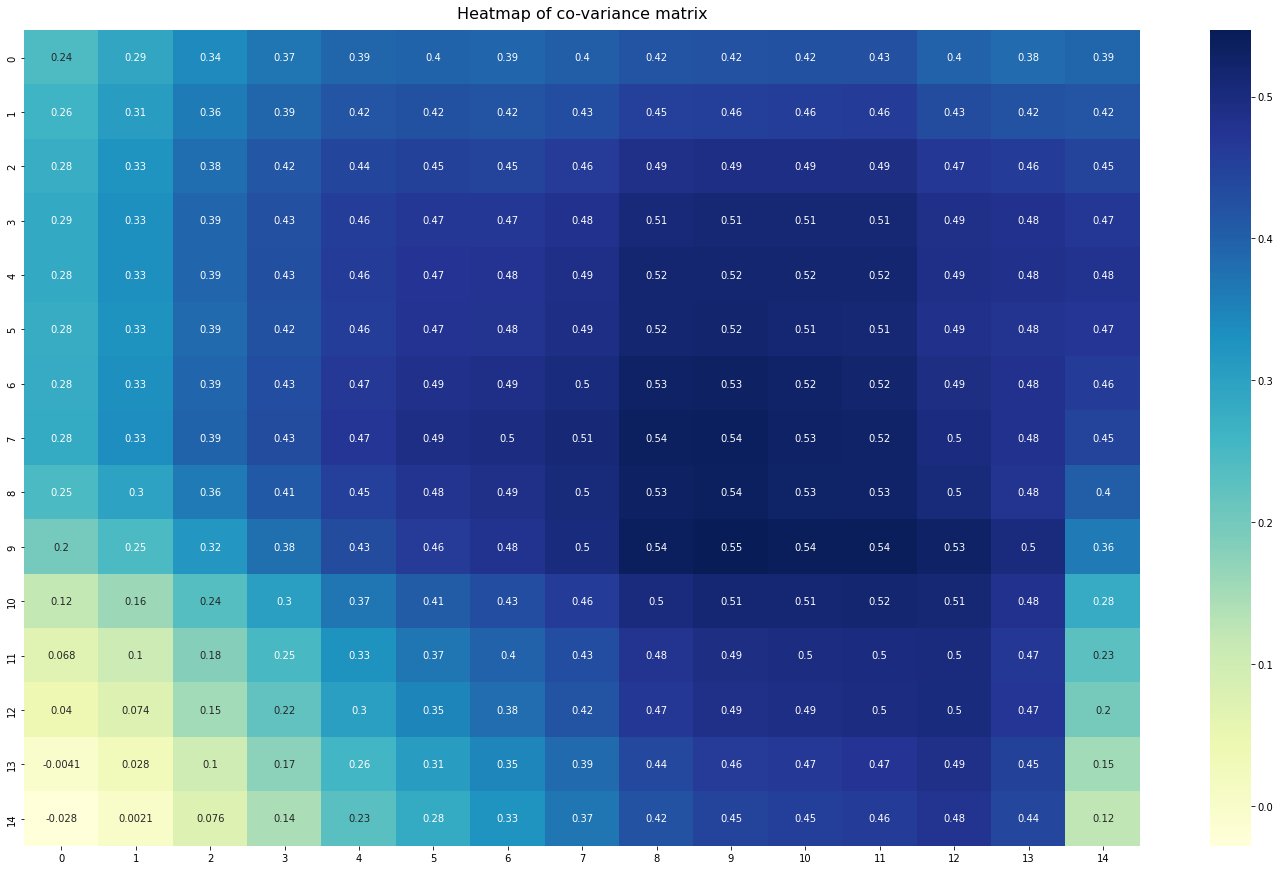

In [102]:
plt.figure(figsize=(25, 15)) # Before and after construction, the figure's size and location are described by plt.figure.
# heatmap = sns.heatmap(A,vmin=-1, vmax=2,)
sns.heatmap(A[:15,60:75],cmap="YlGnBu",annot=True) # When annot=True, the seaborn heatmap is used to print the heatmap of the covariance matrix.
# Give the heatmap a name. Pad specifies how far the heatmap's title is from the top.
plt.title('Heatmap of co-variance matrix', fontdict={'fontsize':16}, pad=12); #title of heatmap is displayed
plt.show() # The created heatmap is displayed with the command #plt.show.

Heatmap from seaborn library is used to plot heatmap of a covariance matrix. A matrix is supplied into the heatmap function, which then plots a heatmap of the matrix with the matrix's values represented by colors. The annot option determines whether to annotate the heatmap's cells with their associated values or not. The cmap argument defines the color map to use for the heatmap. Title of heatmap is also displayed along with pad which specifies the distance between the title and top of the plot. 

Finally, the heatmap is shown using the show function. A heatmap is a helpful visualization tool for examining a matrix's structure and spotting trends or correlations between different variables. The heatmap is being used in this instance to display the covariance using blue, yellow and green color as shown above.

## **Identify Principal Components:**

Determine the **explained** **variance** by each **principal components**, based on this we can determine how
many principal components to pick from.
• Experiment with Principal Components:

– Pick **three different combination** of principal components with **various** **explained variance value** and **compare** the result.

In [103]:
# assuming that the covariance matrix is called cov
# discover the eigenvalues and covariance matrix's vector
eigenvalues, eigenvectors = np.linalg.eig(A) # For numpy linear algebra, the.eig function is used to find eigenvalues and eigenvectors.

# Eigenvalues and eigenvectors should be arranged in decreasing order.
idx = eigenvalues.argsort()[::-1] # using [::-1] to reverse the process for descending and argsort() to put values in ascending order
eigenvalues = eigenvalues[idx] # eigen values listed in reverse
eigenvectors = eigenvectors[:,idx] # eigen vector should be kept in descending order.

# Determine the explained variance.
explained_variance = eigenvalues / eigenvalues.sum() # Calculate the PCA components by calculating the Explained Variance.
explained_variance # displaying 'explained_variance'



array([ 2.76710314e-01,  2.26594729e-01,  9.95371403e-02,  6.93351592e-02,
        4.82445742e-02,  3.60690866e-02,  3.23452566e-02,  2.97095875e-02,
        2.02636198e-02,  1.68651219e-02,  1.46459246e-02,  1.25415995e-02,
        1.07921623e-02,  9.90638305e-03,  7.31034649e-03,  6.73650398e-03,
        6.08383873e-03,  5.56522863e-03,  4.98457808e-03,  4.21981655e-03,
        4.06547289e-03,  3.72678155e-03,  3.48902498e-03,  3.21747898e-03,
        2.92569379e-03,  2.38475365e-03,  2.25002532e-03,  2.09571952e-03,
        1.91071574e-03,  1.83380307e-03,  1.73420349e-03,  1.54097538e-03,
        1.52285688e-03,  1.40111029e-03,  1.34226234e-03,  1.17207444e-03,
        1.14641176e-03,  1.05553612e-03,  1.00570437e-03,  9.64926951e-04,
        9.17051397e-04,  8.54898074e-04,  7.94728867e-04,  7.55569202e-04,
        7.19573760e-04,  7.00350002e-04,  6.89900395e-04,  6.61004984e-04,
        6.04032707e-04,  5.73650654e-04,  5.57151865e-04,  5.34922515e-04,
        5.09303733e-04,  

The above code performs a principal component analysis(PCA) on a covariance matrix. A dimensionality reduction method called PCA is used to determine a dataset's underlying structure. This is accomplished by locating a lower-dimensional projection of the data that retains the most variance possible. 'linalg' function is used to compute the quantities and the eigen values and eigen vectors are sorted by decreasing the eigen values. Explained variance is calculated by dividing eigen values by the sum of all the eigen values. 

The explained variance is then shown. The first principle component in a PCA is the one that accounts for the greatest amount of data variation, the second principal component is the one that accounts for the next-greatest amount of variance, and so on. The explained variance can be used to calculate the number of principal components needed to accurately represent the data's variation.

In [104]:
k = 1  # keep 1 as the first sample
pcs1 = eigenvectors[:, :k] # The only value that is retrieved and saved in a variable is the sample value from the eigen vector.
pca1 = cov1 @ pcs1 # keeping the top PCs

# Using the PCA projection, reassemble the image array.
reconstructed1 = pca1 @ pcs1.T + mean_values # the pca projection times its transposed value plus the mean value added together
reconstructed1 # displaying 'reconstructed1'
# displaying the results of the first PCA sample 3 for the picture array


array([[ 0.00452565, -0.04047342, -0.09207447, ..., -0.16382926,
        -0.19097753, -0.21035127],
       [ 0.00492905, -0.04408103, -0.10028155, ..., -0.17843221,
        -0.20800034, -0.22910096],
       [ 0.00544479, -0.04869334, -0.11077426, ..., -0.19710203,
        -0.22976395, -0.25307239],
       ...,
       [ 0.01144396, -0.10234461, -0.23282751, ..., -0.41427288,
        -0.48292235, -0.53191248],
       [ 0.01162422, -0.10395675, -0.23649503, ..., -0.42079854,
        -0.49052938, -0.54029121],
       [ 0.01162806, -0.10399102, -0.23657299, ..., -0.42093726,
        -0.49069108, -0.54046932]])

The above code is using the top principal component of a PCA to reconstruct an image. The image is then projected onto the top principal component by performing a matrix multiplication between the projection and the transpose of the top principal component. The reconstructed image is then shown. By transferring a dataset onto a lower-dimensional space specified by the top PCs, PCA can be used to reduce the dimensionality of a dataset. In addition to being beneficial for displaying high-dimensional data, this can enhance machine learning algorithm performance by lowering the amount of features that need to be processed.

In this experiment 1, the value of k is set to 1. It states that it captures the first most variance data which is used to represent the data in lower dimensional space which can also be used for visualizing and reducing. This improves the performance of machine learning.



In [105]:
k = 8  # keeping 8 as the second sample
pcs2 = eigenvectors[:, :k] # The sample value from the eigen vector is the only value that is obtained and saved in a variable.
pca2 = cov1 @ pcs2 # keeping the top PCs

# Using the PCA projection, reassemble the image array.
reconstructed2 = pca2 @ pcs2.T + mean_values # the pca projection times its transposed value plus the mean value added together
reconstructed2 # displaying 'reconstructed2'
# displaying the results of the second PCA sample 3 for the picture array

array([[ 0.28389915,  0.25663219,  0.22408137, ..., -0.61223613,
        -0.54125938, -0.48867924],
       [ 0.36410474,  0.33397174,  0.2975659 , ..., -0.69311956,
        -0.61867033, -0.56156993],
       [ 0.4933423 ,  0.45798911,  0.41404585, ..., -0.80295403,
        -0.72128228, -0.65484439],
       ...,
       [-0.44577096, -0.5624069 , -0.68531575, ...,  0.71840771,
         0.68601982,  0.67117813],
       [-0.44296391, -0.55269789, -0.66443236, ...,  0.64659959,
         0.61717998,  0.60320312],
       [-0.40383107, -0.50908624, -0.61392654, ...,  0.57546397,
         0.55580308,  0.54997731]])

In this experiment 2, the value of k is set to 8. It states that it captures the eighth most variance data which is used to represent the data in lower dimensional space which can also be used for visualizing and reducing. This improves the performance of machine learning.



In [106]:
k = 25  # keeping 25 as the third sample
pcs3 = eigenvectors[:, :k] # The sample value from the eigen vector is the only value that is obtained and saved in a variable.
pca3 = cov1 @ pcs3 # keeping the top PCs

# Reconstruct the image array from the PCA projection
reconstructed3 = pca3 @ pcs3.T + mean_values # the pca projection times its transposed value plus the mean value added together
reconstructed3 # displaying 'reconstructed3'
# displaying the results of the third PCA sample 3 for the picture array

array([[ 0.62575791,  0.67004898,  0.70745544, ..., -0.69259903,
        -0.54863206, -0.46446807],
       [ 0.7826368 ,  0.80378808,  0.81442651, ..., -0.75219845,
        -0.59948719, -0.50872876],
       [ 0.99023335,  0.97949624,  0.95274212, ..., -0.84157093,
        -0.69275598, -0.59853935],
       ...,
       [-0.86010896, -0.96416468, -1.02733236, ...,  0.82432548,
         1.06971897,  1.24139476],
       [-0.70876321, -0.80472121, -0.87755316, ...,  0.72051386,
         1.00975832,  1.18396328],
       [-0.4755537 , -0.57187891, -0.68123735, ...,  0.55599205,
         0.81480411,  0.96553021]])

In this experiment 3, the value of k is set to 25. It states that it captures the twentyfifth most variance data which is used to represent the data in lower dimensional space which can also be used for visualizing and reducing. This improves the performance of machine learning.



## **Reconstruction of the image:**

Reconstruct the image based on number of principal components you picked in step **5.5.**
Reconstruct all three images and conclude the result based on your observation. Display the reconstructed
image, experiment with various number of components.

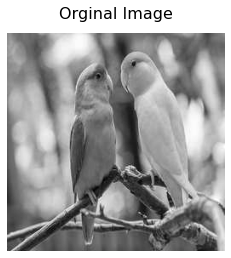

In [107]:
#Creating the orginal image to compare 
plt.imshow(im_arry,cmap="gray") #use of plt.imshow for constructing the image cmap is use for gray scale image 
plt.axis('off') # plt.axis is use to off the axis value which was shown while plotting 
plt.title('Orginal Image', fontdict={'fontsize':16}, pad=15); # titile of image is given where fontsize is 16 and pad= 15 means distance of title and image

Showing the original image before comparing it to another is generally a good practice. This allows the viewer to see the original image and understand its context, and then make a comparison with the other images to see how the images are similar or different. The viewer can better understand the context and significance of the comparison between the images by first viewing the original image.

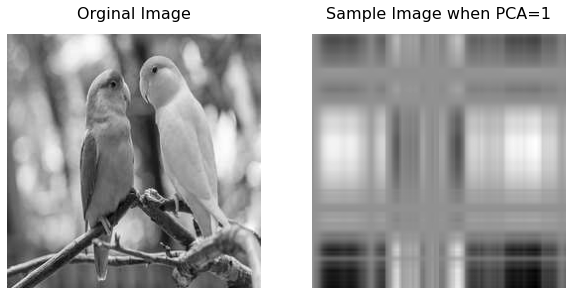

In [108]:
# Use the sample that was previously reconstructed to create an image.
#Create an image using the reconstructed1 sample1 from the previous question.
#PCA=1
#Create an image using the reconstructed1 sample1 from the previous question.
#PCA=1
fig=plt.figure(figsize=(10,10)) #defines the figure size 
rows=1 #define the row 
columns=2 #define the columns
fig.add_subplot(rows,columns,1) #define where to plot the given image row=1, columns=1
plt.imshow(im_arry,cmap="gray") #use of plt.imshow for constructing the image cmap is use for gray scale image 
plt.axis('off') # plt.axis is use to off the axis value which was shown while plotting 
 # titile of image is given where fontsize is 16 and pad= 15 means distance of title and image 
plt.title('Orginal Image', fontdict={'fontsize':16}, pad=15);

fig.add_subplot(rows,columns,2) #define where to plot the given image row=1, columns=2
plt.imshow(reconstructed1,cmap="gray") #use of plt.imshow for constructing the image cmap is use for gray scale image 
plt.axis('off') # plt.axis is use to off the axis value which was shown while plotting
# titile of image is given where fontsize is 16 and pad= 15 means distance of title and image 
plt.title('Sample Image when PCA=1', fontdict={'fontsize':16}, pad=15);


By visualizing the image we can conclude that if the value of PCA is low(k=1) then personal component captures the lowest variance due to which the image is constructed as blur as shown above. The variance in quality of the image could be seen from the above results. The eigenvectors of the covariance matrix are used to define the PCs, which are a transformed set of coordinates for the data that are chosen to capture as much of the variance in the data as possible. The PCs can then be used for various purposes, such as dimensionality reduction, visualization, or machine learning.

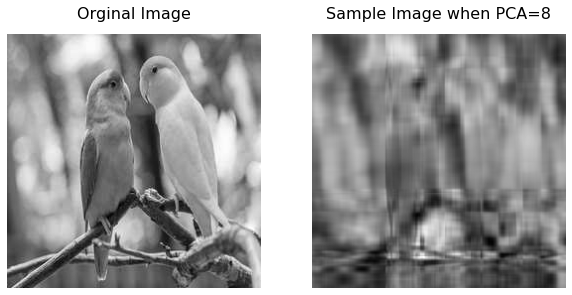

In [109]:
# Utilizing the sample from the previous question that was rebuilt, create a picture.
#Create an image using the reconstructed2 sample2 from the previous question.
#PCA=8
fig=plt.figure(figsize=(10,10)) #defines the figure size 
rows=1 #define the row 
columns=2 #define the columns
fig.add_subplot(rows,columns,1) #define where to plot the given image row=1, columns=1
plt.imshow(im_arry,cmap="gray") #use of plt.imshow for constructing the image cmap is use for gray scale image 
plt.axis('off') # plt.axis is use to off the axis value which was shown while plotting 
 # titile of image is given where fontsize is 16 and pad= 15 means distance of title and image 
plt.title('Orginal Image', fontdict={'fontsize':16}, pad=15);

fig.add_subplot(rows,columns,2) #define where to plot the given image row=1, columns=2
plt.imshow(reconstructed2,cmap="gray")#use of plt.imshow for constructing the image cmap is use for gray scale image 
plt.axis('off') # plt.axis is use to off the axis value which was shown while plotting
# titile of image is given where fontsize is 16 and pad= 15 means distance of title and image 
plt.title('Sample Image when PCA=8', fontdict={'fontsize':16}, pad=15);


By visualizing the image we can conclude that if the value of PCA is low(k=8) then personal component captures the lowest variance due to which the image is constructed as blur image which is very hard to visualize as shown above. The variance in quality of the image could be seen from the above results. The PCs, which are a transformed set of coordinates for the data selected to capture as much of the variance in the data as feasible, are defined using the eigenvectors of the covariance matrix. After that, the PCs can be utilized for a variety of tasks like dimensionality reduction, visualization, or machine learning.

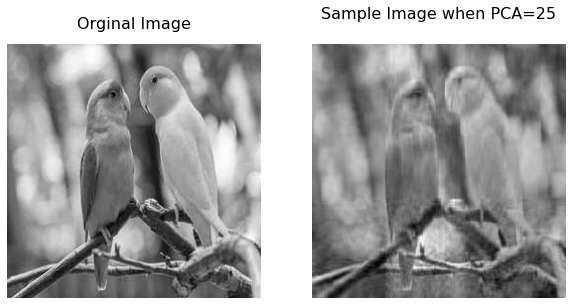

In [110]:
# Utilizing the sample from the previous question that was rebuilt, create a picture.
#Create an image using the reconstructed3 sample3 from the previous question.
#PCA=25
fig=plt.figure(figsize=(10,10)) #defines the figure size 
rows=1 #define the row 
columns=2 #define the columns
fig.add_subplot(rows,columns,1) #define where to plot the given image row=1, columns=1
plt.imshow(im_arry,cmap="gray") #use of plt.imshow for constructing the image cmap is use for gray scale image 
plt.axis('off') # plt.axis is use to off the axis value which was shown while plotting 
 # titile of image is given where fontsize is 16 and pad= 15 means distance of title and image 
plt.title('Orginal Image', fontdict={'fontsize':16}, pad=15);

fig.add_subplot(rows,columns,2) #define where to plot the given image row=1, columns=2
plt.imshow(reconstructed3,cmap="gray") #use of plt.imshow for constructing the image cmap is use for gray scale image 
plt.axis('off')# plt.axis is use to off the axis value which was shown while plotting
# titile of image is given where fontsize is 16 and pad= 15 means distance of title and image 
plt.title('Sample Image when PCA=25', fontdict={'fontsize':16}, pad=25);


By visualizing the image we can conclude that if the value of PCA is high(k=25) then personal component captures the highest variance due to which the image is constructed and image is somehow easy to visualize as shown above. The variance in quality of the image could be seen from the above results. The eigenvectors of the covariance matrix are used to define the PCs, which are a transformed set of coordinates for the data chosen to capture as much variance in the data as is practical. The PCs can then be used for a number of activities like dimensionality reduction, visualization, or machine learning.

**DESCRIPTION**

I used PCA sample 1, which is the smallest sample size, for the first outcome. The image deploys a lot of volatility as a result. The image is entirely illegible and unintelligible. The image is exhibited in gray color mode with total blurring. The PCA's ability to display the results in a smaller lower-dataset causes the image to be deformed and subsequently confusing.

In order to get the second result, I used PCA sample number 8, therefore the value is marginally higher than the first. As a result, the image deploys variance in comparison to the first one. The picture is a little bit clearer than the first one, and we can sort of guess what it's about. The quality of the image likewise improves as the sample value is raised.

The PCA value I used in the final sample was a whopping 25, which is significantly higher than any of the sample values I experimented with previously. The image is a great deal crisper and nearly identical to the original. We can see that the image is clearer and easier to grasp even though it is displayed in a smaller dimension than its original dimension. When we look attentively at the image, we can also see the details of the picture.

In summary, peforming the 3 experiment we can conclude that if we set the value of PCA to lowest then it captures the lowest variance and the reconstruced image is seen blur which is hard to visualize. Likewise, if we set the PCA to highest then it captures the highest variance and the reconstructed image is easy to visualize. 

## **Expirement**

In [111]:
from sklearn.decomposition import PCA
import numpy as np


exp1=explained_variance.reshape(-1,2)
# Initialize the PCA model and specify that we want to keep the top 2 principal components
pca = PCA(n_components=2)

# Fit the model to the data and transform the data using the model
transformed_data = pca.fit_transform(exp1)

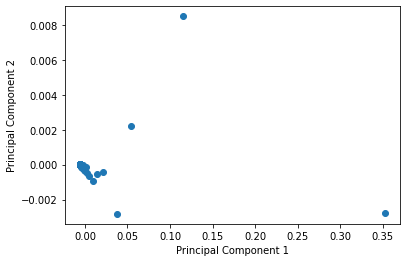

In [112]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

# Add labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

In [113]:
tot = sum(eigenvalues)
var_exp = np.array([(i / tot)*100 for i in sorted(eigenvalues, reverse=True)])
cum_var_exp = np.cumsum(var_exp)
var_exp.shape

(256,)

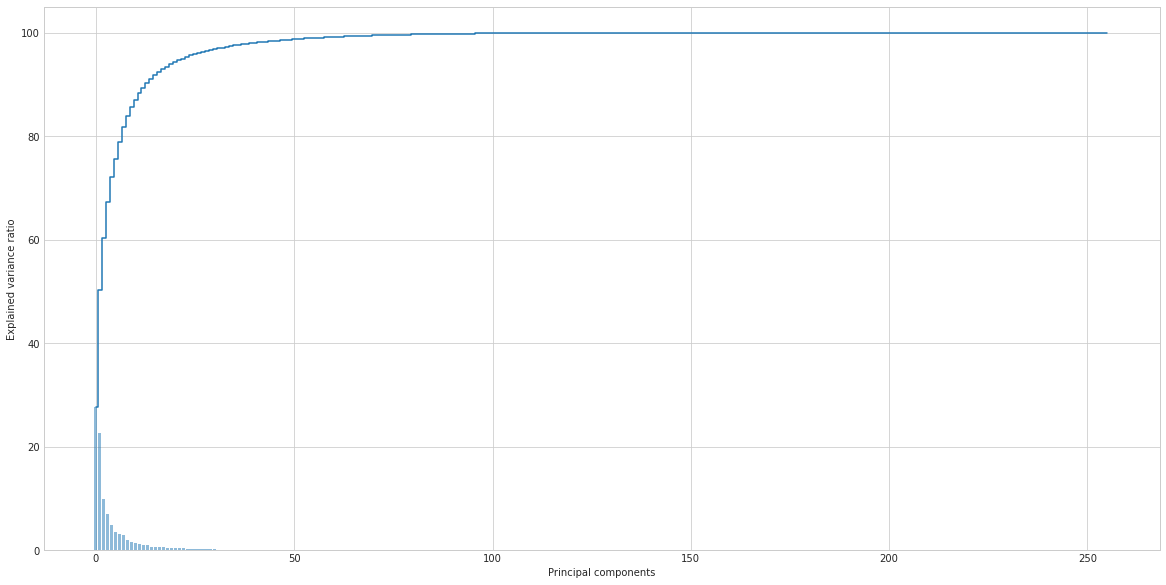

In [114]:
with plt.style.context('seaborn-whitegrid'):

    plt.figure(figsize=(20, 10))
  # Calculate the explained variance
    plt.bar(range(256), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(256), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')

In [115]:
matrix_w1 = np.hstack((transformed_data[0][1].reshape(1,1),
                      transformed_data[1][1].reshape(1,1),
                      transformed_data[2][1].reshape(1,1)
                      ))
matrix_w1.shape



(1, 3)

In [116]:
matrix_w2 = np.hstack((transformed_data[11][1].reshape(1,1),
                      transformed_data[25][1].reshape(1,1),
                      transformed_data[30][1].reshape(1,1)))
matrix_w2.shape



(1, 3)

In [117]:
matrix_w3 = np.hstack((transformed_data[100][1].reshape(1,1),
                      transformed_data[45][1].reshape(1,1),
                      transformed_data[65][1].reshape(1,1)))
matrix_w3.shape


(1, 3)

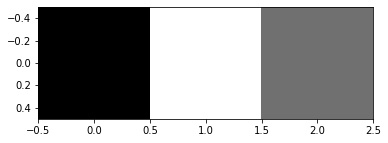

In [118]:
plt.imshow(matrix_w1,cmap='gray')
plt.show()

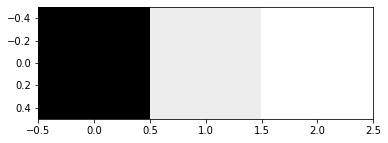

In [119]:
plt.imshow(matrix_w2,cmap='gray')
plt.show()

In [120]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(evalue[i]), evector[:,i]) for i in range(len(evalue))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
71.11563594429603
58.235733943448594
25.581435402297476
17.819407824492153
12.399044754409998
9.269896703253252
8.312857789672684
7.635480507610353
5.207829759492543
4.334402455315426
3.764060060892576
3.2232402644193976
2.77362803225276
2.5459792912232566
1.8787877152338985
1.731307939330186
1.563570412006587
1.4302855824579035
1.2810561131168747
1.084509400577774
1.0448424768403588
0.9577974743425683
0.8966931032138894
0.8269047146353546
0.7519147776327529
0.6128910412971937
0.5782653314102891
0.5386081339811372
0.4910614384043777
0.4712945814041094
0.44569709843084643
0.3960367166979369
0.39138018934066204
0.3600908381050456
0.3449666852635833
0.30122772694890737
0.29463231875148604
0.2712769233400963
0.258469966577495
0.24799001038833862
0.2356858054153009
0.21971215758644516
0.20424843528909575
0.19418424791697586
0.1849332781314229
0.17999269708389717
0.17730710699782912
0.16988087293654203
0.155238774446355
0.1474304677594256
0.1431902142870757
0